# Crate Project
## Notebook Summary
In this notebook we will be creating a XGBoost Model that will classify various products from the Otto Group into their major product categories.
This project is a submission to the Kaggle Challenge presented by the Otto Group.
An in-depth description of the Otto Group and the challenge can be found here:
https://www.kaggle.com/c/otto-group-product-classification-challenge/overview

##These are the steps we will follow in this notebook.
###1.Import Necessary Libraries (Daniel)
###2.Read In the Data Files (Daniel)
###3.Clean and Organize the Data (James)
###4.Build an XGBoost Model (Both together)
###5.Test against split train data (Both together)
###6.Test against test data and submit to Kaggle (James)

##Step 1: Import the Necessary Libraries

In [ ]:
#Import the pandas library
import pandas as pd

#Import the numpy library
import numpy as np

#Import XGBoost Classifier from XGBoost
from xgboost import XGBClassifier

#Import data visualization library
import matplotlib.pyplot as plt

#Import libraries from sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


##Step 2: Read In the Data Files

In [ ]:
#Import the train and test csv files.
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
train

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,4,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,...,0,0,2,0,0,11,0,1,1,0,1,0,7,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,7,2,2,0,0,0,58,0,10,0,0,0,0,0,3,0,...,1,0,0,0,0,0,0,0,0,0,2,1,5,0,0,4,0,0,2,1,0,1,0,0,1,1,2,2,0,22,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,Class_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61873,61874,1,0,0,1,1,0,0,0,0,0,0,1,3,0,0,9,0,2,0,0,0,7,0,3,6,1,0,0,65,1,0,4,3,1,1,1,2,1,0,...,3,1,0,0,0,1,0,22,0,1,4,11,3,0,0,3,0,1,1,2,0,0,29,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,Class_9
61874,61875,4,0,0,0,0,0,0,0,0,0,0,0,4,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,2,1,0,2,0,0,0,...,0,0,0,0,0,0,0,1,2,0,0,1,5,0,0,0,0,0,0,0,0,0,1,0,11,0,0,0,0,0,0,2,0,0,2,0,0,1,0,Class_9
61875,61876,0,0,0,0,0,0,0,3,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,2,0,0,0,...,0,0,0,0,19,0,0,4,0,0,0,0,18,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,Class_9
61876,61877,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,2,1,0,0,1,2,0,0,2,1,0,0,5,0,0,0,...,0,0,1,0,0,0,0,2,0,0,0,0,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,10,0,Class_9


##Step 3: Organize the Data
Since this data is already organized all we need to do is split it into labels and features. We will also have to split the train data to have a test set for our models.


In [ ]:
#Create the features for test and train
train_features = train.drop(columns = ['id','target'])
test_features = test.drop(columns= ['id'])
#Create the labels for training set
#Creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
train['Label'] = labelencoder.fit_transform(train['target'])
train_label = train['Label']


#Split the train features and labels to have a test set
train_features,train_t_features,train_label,train_t_label = train_test_split(train_features,train_label,test_size =.2)

##Step 4: Building a Test Model
Next we want to create a generic test model to see our loss, then we 

In [ ]:
#Build the parameters
params = { "n_estimators": 400, 'tree_method':'gpu_hist', 'predictor':'gpu_predictor'}
#Display the model
model = XGBClassifier(**params)
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic',
              predictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, tree_method='gpu_hist', verbosity=1)

In [ ]:
#Fit the model
model.fit(train_features,train_label)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='multi:softprob',
              predictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, tree_method='gpu_hist', verbosity=1)

#Step 5. Test against the split train data

In [ ]:
#Get train_t_features predictions
train_t_predictions = model.predict(train_t_features)
accuracy_score(train_t_label,train_t_predictions)

0.7996929541047189

With an 80% accuracy, we decided that was efficient enough to test against the test data set and see what our score was.

#Step 6. Test against the test data and create submission

In [ ]:
#Get the final predictions as probabilities for Kaggle Submission
item_predictions = model.predict_proba(test_features)

In [ ]:
#Creating the submission file
submission = pd.DataFrame(data=item_predictions,columns=(np.unique(train.target)))
submission.insert(0,'id',test['id'])
submission.to_csv("Submission1.csv", index=False)

##After submitting to Kaggle to find how well the classifier performed, this was the outcome!

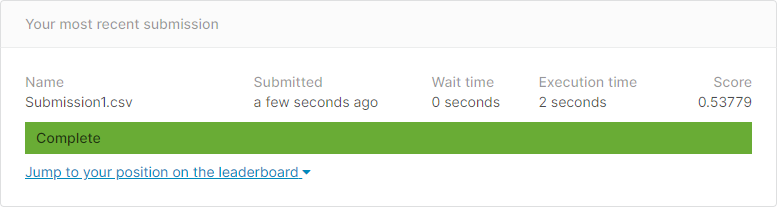

With our low score of 0.53779, that meant our classifier was fairly accurate in guessing the class of the item. 

Daniels Portions:
Did Step 1 and Step 2, and helped to build the XG Boost model.